In [3]:
import pandas as pd

In [2]:
df=pd.read_excel(r"C:\Users\sarav\OneDrive\Desktop\DA pactice\Copy of Walmart Sales(1750).xlsx")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


In [4]:
#Calculate total revenue
df['Total revenue']=df['Unit price']*df["Quantity"]
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Total revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17


### Analyze the performance of sales and revenue at the city and branch level

In [5]:
#Group by branch and calculate total revenue and sales
branch_perf=df.groupby('Branch').agg({'Quantity':sum,'Total revenue':sum}).reset_index()
branch_perf.head()

,Branch,Quantity,Total revenue
0,A,1883,103763.00
1,B,1899,107567.19
2,C,1728,96257.19


In [7]:
#Visulaization
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\sarav\AppData\Local\Temp\ipykernel_9736\2994228566.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=branch_perf,x='Branch',y='Total revenue',ax=ax1,ci=None)
C:\Users\sarav\AppData\Local\Temp\ipykernel_9736\2994228566.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=branch_perf,x='Branch',y='Quantity',marker='o',ax=ax2,ci=None)


NameError: name 'unique_handles' is not defined

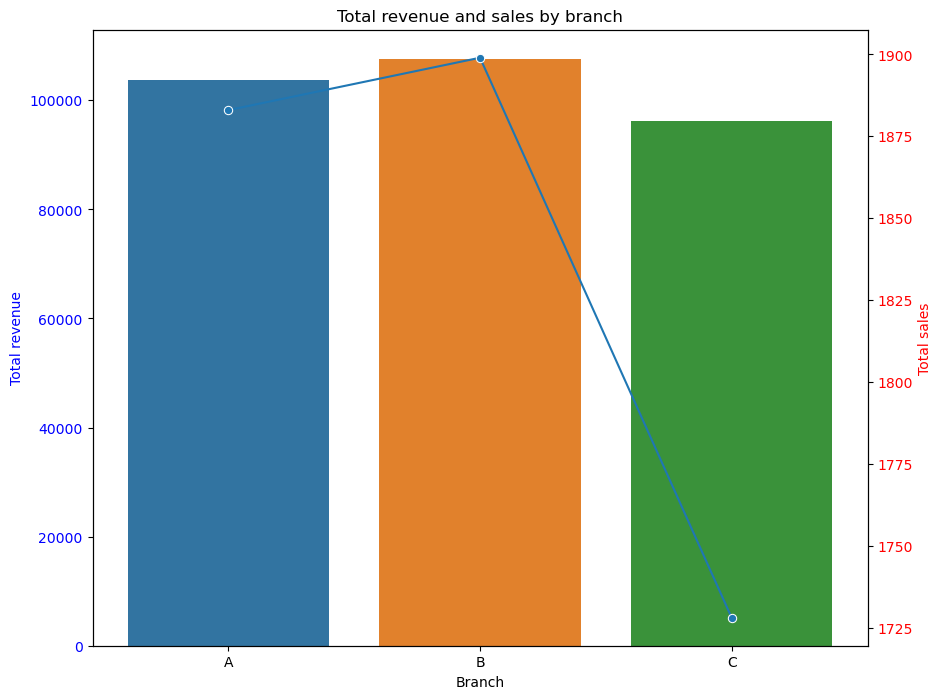

In [8]:
fig, ax1 =plt.subplots(figsize=(10,8))
#Primary axis
sns.barplot(data=branch_perf,x='Branch',y='Total revenue',ax=ax1,ci=None)
ax1.set_title("Total revenue and sales by branch")
ax1.set_ylabel("Total revenue",color='b')
ax1.tick_params(axis='y',labelcolor='b')
#Secondary axis
ax2=ax1.twinx()
sns.lineplot(data=branch_perf,x='Branch',y='Quantity',marker='o',ax=ax2,ci=None)
ax2.set_ylabel("Total sales",color='r')
ax2.tick_params(axis='y',labelcolor='r')

ax1.legend(unique_handles, unique_labels, loc='upper left', title='Metric')


In [9]:
#Group by city and calculate total revenue and sales
city_perf=df.groupby('City').agg({'Quantity':sum,'Total revenue':sum}).reset_index()
city_perf.head()

,City,Quantity,Total revenue
0,Mandalay,1820,101140.64
1,Naypyitaw,1831,105303.53
2,Yangon,1859,101143.21


C:\Users\sarav\AppData\Local\Temp\ipykernel_9736\2219570654.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=city_perf,x='City',y='Total revenue',ax=ax1,ci=None)
C:\Users\sarav\AppData\Local\Temp\ipykernel_9736\2219570654.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=city_perf,x='City',y='Quantity',marker='o',ax=ax2,ci=None)


NameError: name 'unique_handles' is not defined

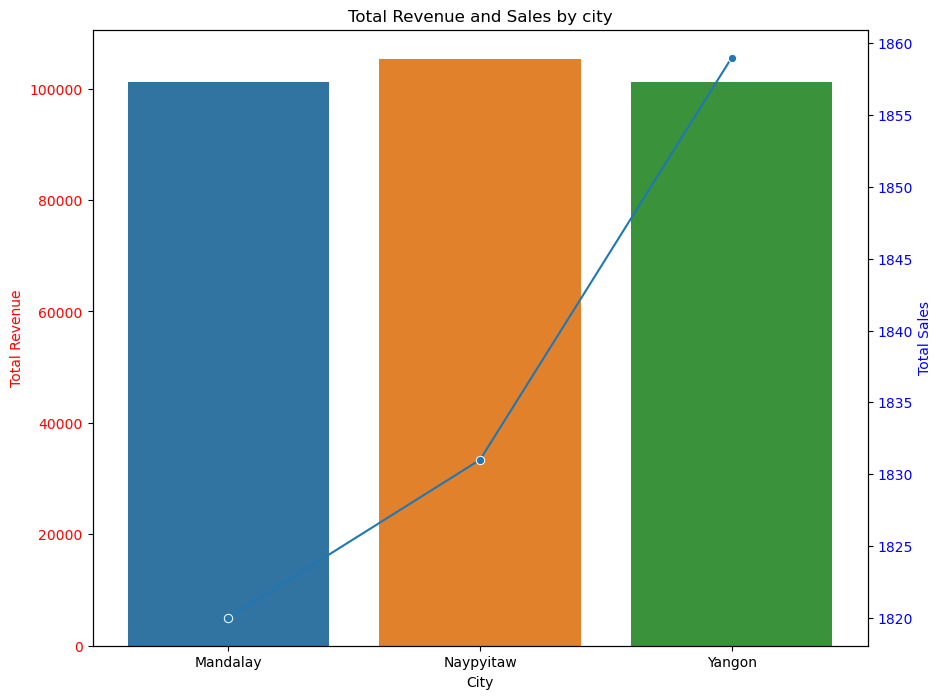

In [10]:
#Visulaization
fig, ax1 = plt.subplots(figsize=(10,8))
#Primary axis
sns.barplot(data=city_perf,x='City',y='Total revenue',ax=ax1,ci=None)
ax1.set_title('Total Revenue and Sales by city')
ax1.set_xlabel('City')
ax1.set_ylabel('Total Revenue',color='r')
ax1.tick_params(axis='y',labelcolor='r')
#Secondary axis
ax2=ax1.twinx()
sns.lineplot(data=city_perf,x='City',y='Quantity',marker='o',ax=ax2,ci=None)
ax2.set_ylabel('Total Sales',color='b')
ax2.tick_params(axis='y',labelcolor='b')

ax1.legend(unique_handles,unique_labels,loc="upper left",title="Metric")



In [11]:
#Comparison and combine of city and branch performance
branch_city_perf=df.groupby(['Branch','City']).agg({'Quantity':sum,'Total revenue':sum}).reset_index()
branch_city_perf.head(9)

,Branch,City,Quantity,Total revenue
0,A,Mandalay,637,34130.09
1,A,Naypyitaw,648,35985.64
2,A,Yangon,598,33647.27
3,B,Mandalay,664,37215.93
4,B,Naypyitaw,604,35157.75
5,B,Yangon,631,35193.51
6,C,Mandalay,519,29794.62
7,C,Naypyitaw,579,34160.14
8,C,Yangon,630,32302.43


For better understanding analysis for revenue and sales down separtely and combinely for branch and city

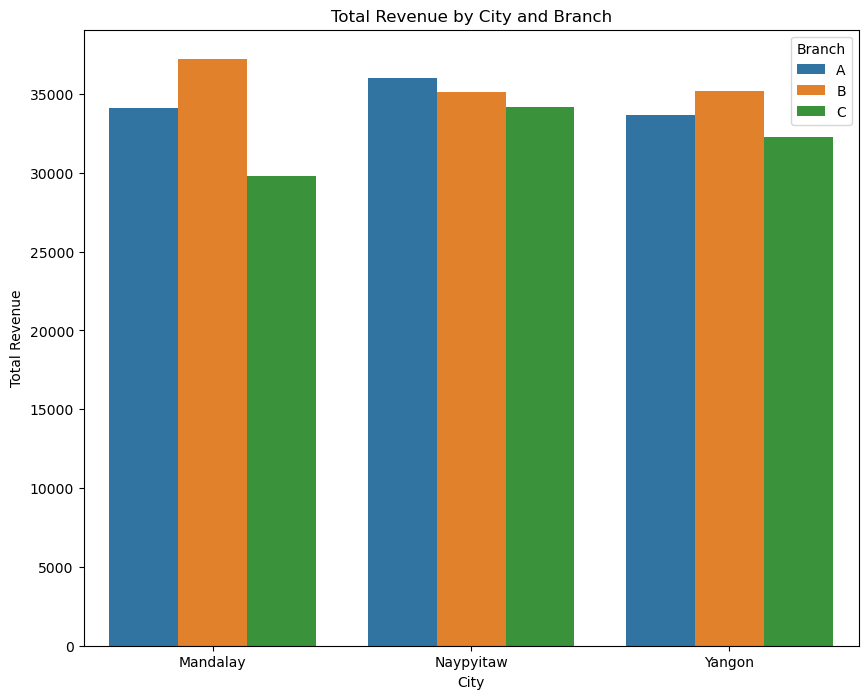

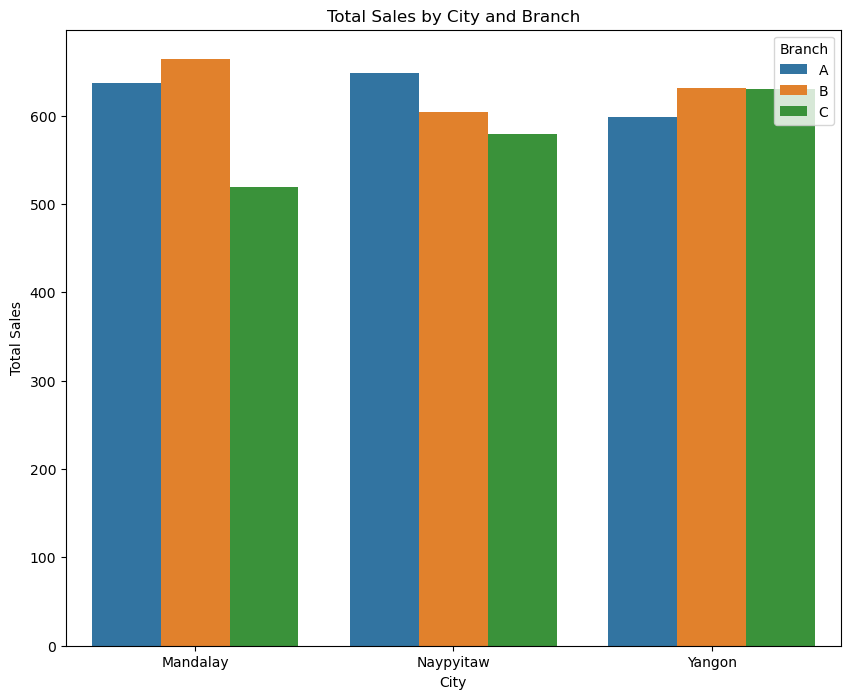

In [12]:
#Total Revenue generate by Branch and City
plt.figure(figsize=(10,8))
sns.barplot(data=branch_city_perf,x='City',y='Total revenue',hue='Branch')
plt.title('Total Revenue by City and Branch')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.legend(title='Branch')
#Total Sales generate by branch and city
plt.figure(figsize=(10,8))
sns.barplot(data=branch_city_perf,x='City',y='Quantity',hue='Branch')
plt.title('Total Sales by City and Branch')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.legend(title='Branch')

C:\Users\sarav\AppData\Local\Temp\ipykernel_9736\1116153591.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=branch_city_perf,x='City',y='Total revenue',hue='Branch',ax=ax1,ci=None)
C:\Users\sarav\AppData\Local\Temp\ipykernel_9736\1116153591.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=branch_city_perf,x='City',y='Quantity',hue='Branch',marker='o',ax=ax2,ci=None,legend=None)


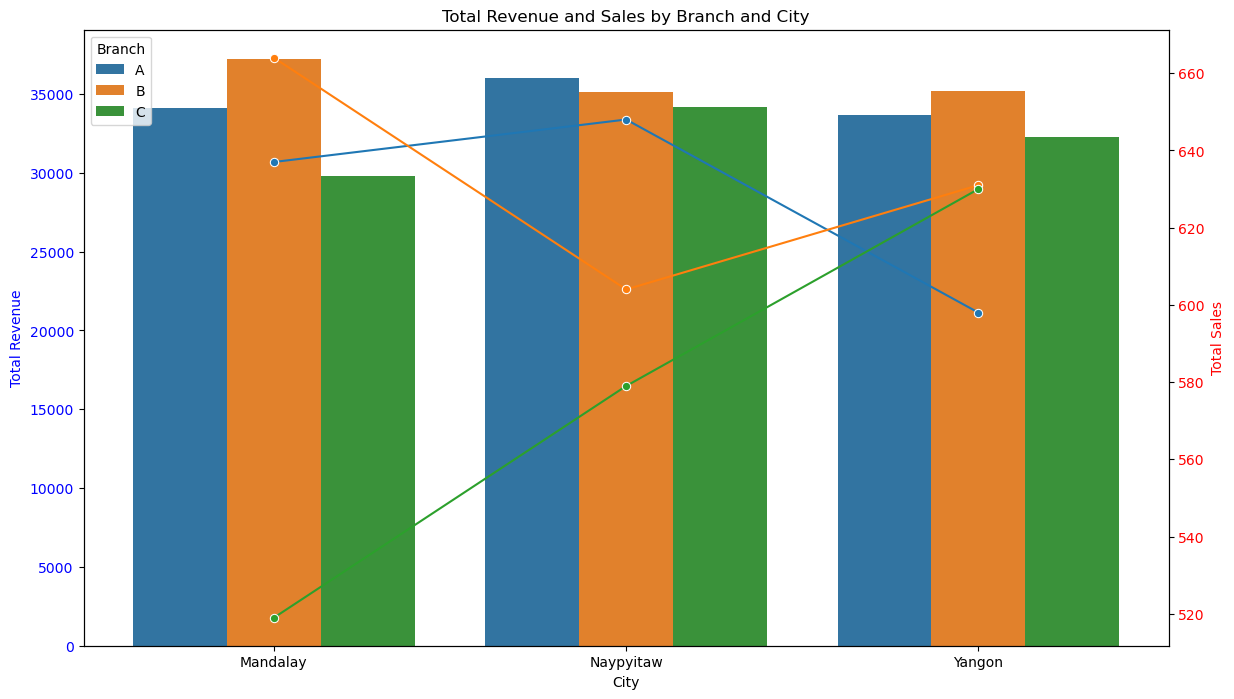

In [13]:
#Combination of Total sales and revenue generate by branch and city for better understanding
#Visulaization
fig, ax1 = plt.subplots(figsize=(14,8))
#primary axis
sns.barplot(data=branch_city_perf,x='City',y='Total revenue',hue='Branch',ax=ax1,ci=None)
ax1.set_title("Total Revenue and Sales by Branch and City")
ax1.set_label('City')
ax1.set_ylabel('Total Revenue',color='b')
ax1.tick_params(axis='y',labelcolor='b')
#Secondary axis
ax2=ax1.twinx()
sns.lineplot(data=branch_city_perf,x='City',y='Quantity',hue='Branch',marker='o',ax=ax2,ci=None,legend=None)
ax2.set_ylabel('Total Sales',color='r')
ax2.tick_params(axis='y',labelcolor='r')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper left', title='Branch')


Insight:
    Brach "B" performance most when compare to others in most city and revenue wise city 'Naypytiaw' performed well. Branch 'B' in city 'Mandalay' performed well when compare to other in terms of sales and revenue.
    

### Calculate Average Price of an Item Sold at Each Branch

In [14]:
branch_city_perf['Avg price']=branch_city_perf['Total revenue']/branch_city_perf['Quantity']
sort_branch_city_perf=branch_city_perf.sort_values('Avg price',ascending=False)
print(sort_branch_city_perf)

  Branch       City  Quantity  Total revenue  Avg price
7      C  Naypyitaw       579       34160.14  58.998515
4      B  Naypyitaw       604       35157.75  58.208195
6      C   Mandalay       519       29794.62  57.407746
2      A     Yangon       598       33647.27  56.266338
3      B   Mandalay       664       37215.93  56.048087
5      B     Yangon       631       35193.51  55.774184
1      A  Naypyitaw       648       35985.64  55.533395
0      A   Mandalay       637       34130.09  53.579419
8      C     Yangon       630       32302.43  51.273698


### Month over Month change by quantity and revenue

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

# Group by Month, Product line, Gender, and Payment Method
mom_analysis = df.groupby(['Month', 'Product line', 'Gender', 'Payment']).agg({
    'Quantity': 'sum',
    'Total revenue': 'sum'
}).reset_index()


In [16]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.to_period('M')
#Group by
month_agg= df.groupby(['Month','Product line','Gender','Payment']).agg({'Quantity':sum,'Total revenue':sum}).reset_index()
month_agg.head(10)

,Month,Product line,Gender,Payment,Quantity,Total revenue
0,2019-01,Electronic accessories,Female,Cash,52,2731.86
1,2019-01,Electronic accessories,Female,Credit card,54,3045.42
2,2019-01,Electronic accessories,Female,Ewallet,43,1576.48
3,2019-01,Electronic accessories,Male,Cash,62,3380.29
4,2019-01,Electronic accessories,Male,Credit card,43,2248.65
5,2019-01,Electronic accessories,Male,Ewallet,79,4951.86
6,2019-01,Fashion accessories,Female,Cash,69,3845.24
7,2019-01,Fashion accessories,Female,Credit card,53,2535.52
8,2019-01,Fashion accessories,Female,Ewallet,75,4475.81
9,2019-01,Fashion accessories,Male,Cash,31,1459.32


In [17]:
# Create pivot tables for Quantity and Revenue
quantity_pivot = month_agg.pivot_table(index=['Product line', 'Gender', 'Payment'], columns='Month', values='Quantity').fillna(0)
revenue_pivot = month_agg.pivot_table(index=['Product line', 'Gender', 'Payment'], columns='Month', values='Total revenue').fillna(0)

# Calculate MoM changes
quantity_mom_change = quantity_pivot.pct_change(axis=1).fillna(0) * 100
revenue_mom_change = revenue_pivot.pct_change(axis=1).fillna(0) * 100

# Rename columns to indicate MoM change
quantity_mom_change.columns = [f'{col}_MoM' for col in quantity_mom_change.columns]
revenue_mom_change.columns = [f'{col}_MoM' for col in revenue_mom_change.columns]

# Merge MoM changes back with the original data for further analysis
mom_changes = pd.concat([quantity_mom_change, revenue_mom_change], axis=1).reset_index()

print(mom_changes.head())


             Product line  Gender      Payment  2019-01_MoM  2019-02_MoM  \
0  Electronic accessories  Female         Cash          0.0    98.076923   
1  Electronic accessories  Female  Credit card          0.0   -27.777778   
2  Electronic accessories  Female      Ewallet          0.0    13.953488   
3  Electronic accessories    Male         Cash          0.0   -41.935484   
4  Electronic accessories    Male  Credit card          0.0    11.627907   

   2019-03_MoM  2019-01_MoM  2019-02_MoM  2019-03_MoM  
0   -50.485437          0.0    89.949705   -46.818753  
1    43.589744          0.0   -16.527770    20.094568  
2   -16.326531          0.0    51.948011     5.136030  
3   161.111111          0.0   -52.955220   157.294136  
4   -54.166667          0.0    39.883486   -79.055409  


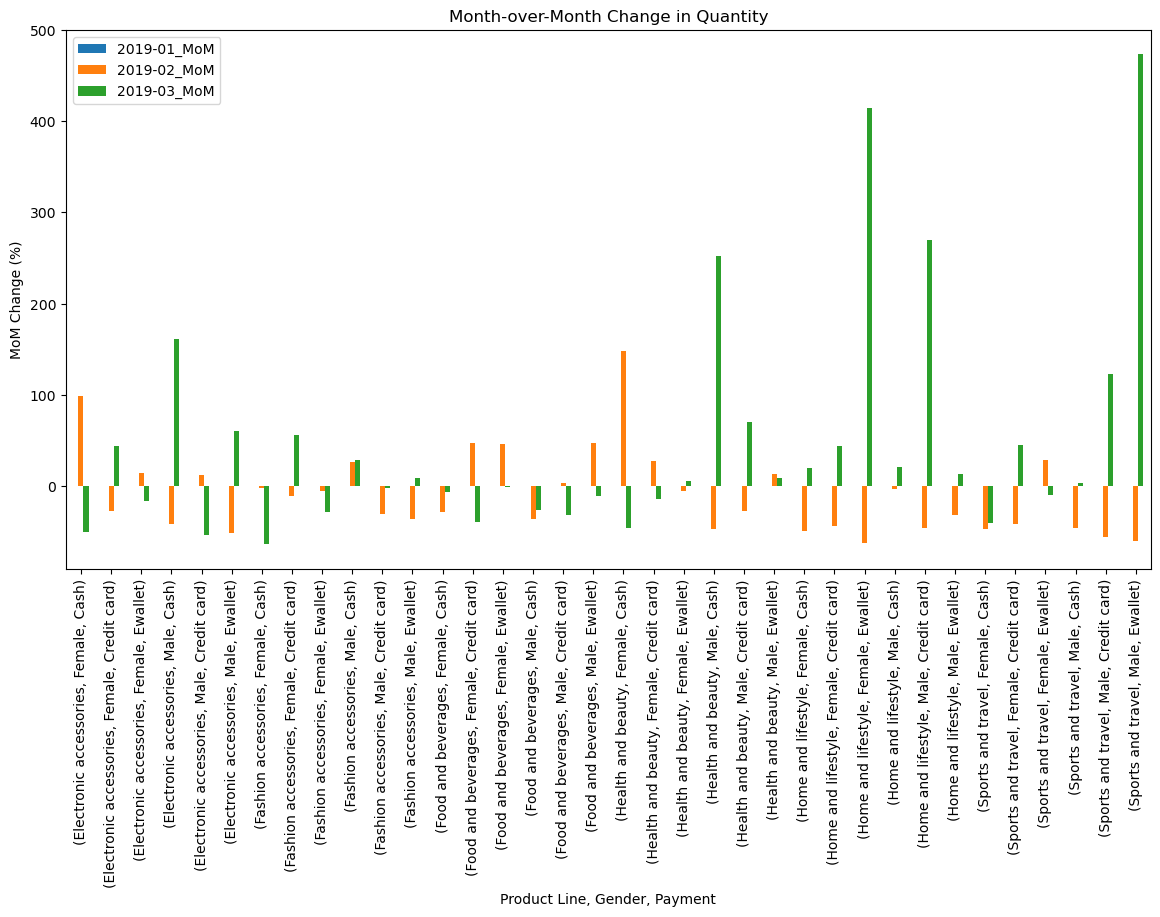

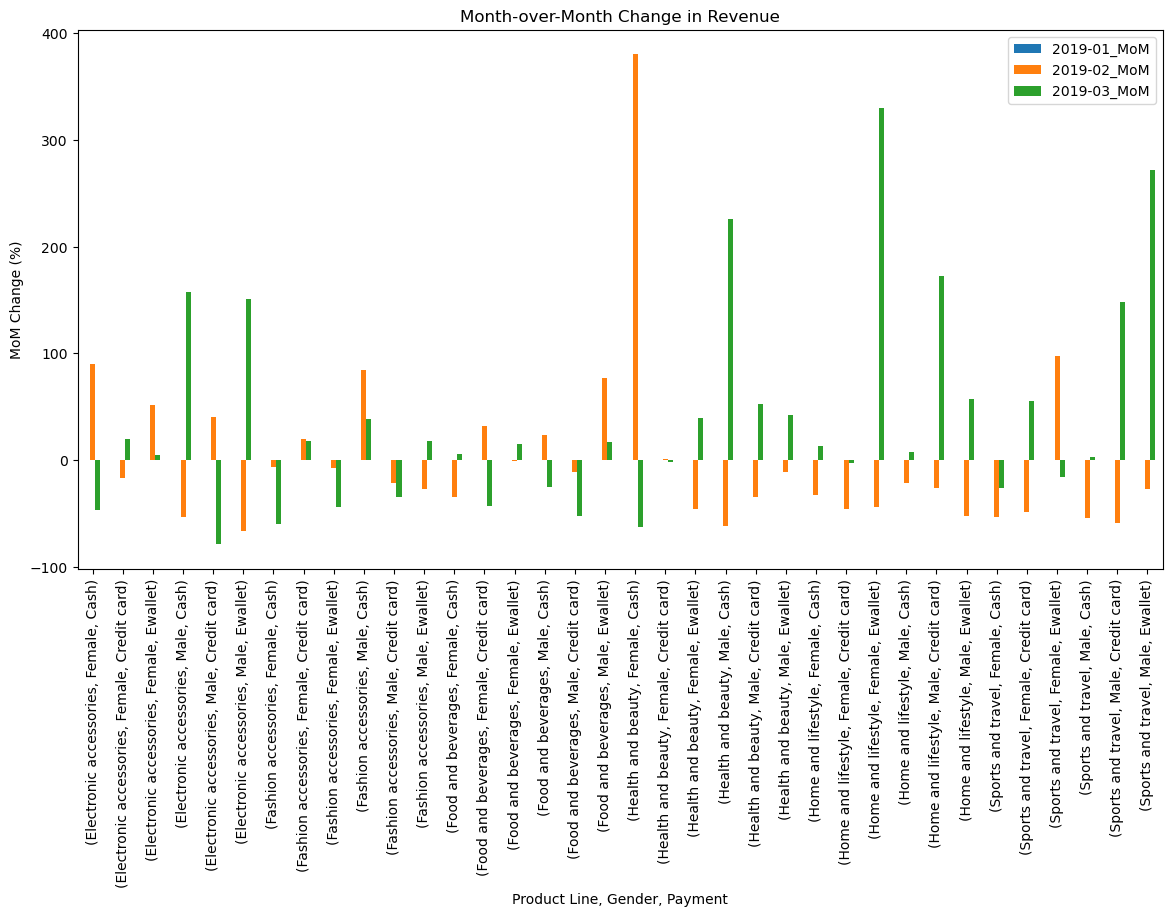

In [18]:
# Function to plot MoM changes
def plot_mom_changes(data, metric, title):
    fig, ax = plt.subplots(figsize=(14, 7))
    data.plot(kind='bar', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Product Line, Gender, Payment')
    ax.set_ylabel('MoM Change (%)')
    plt.xticks(rotation=90)
    plt.show()

# Plot MoM changes for Quantity
plot_mom_changes(quantity_mom_change, 'Quantity MoM Change', 'Month-over-Month Change in Quantity')

# Plot MoM changes for Revenue
plot_mom_changes(revenue_mom_change, 'Revenue MoM Change', 'Month-over-Month Change in Revenue')


### Identify the focus areas to get better sales for April 2019.


In [19]:

month_agg.head()

,Month,Product line,Gender,Payment,Quantity,Total revenue
0,2019-01,Electronic accessories,Female,Cash,52,2731.86
1,2019-01,Electronic accessories,Female,Credit card,54,3045.42
2,2019-01,Electronic accessories,Female,Ewallet,43,1576.48
3,2019-01,Electronic accessories,Male,Cash,62,3380.29
4,2019-01,Electronic accessories,Male,Credit card,43,2248.65


In [36]:
# Filter data for January, February, and March 2019
recent_month=month_agg[month_agg['Month'].isin([pd.Period('2019-01'),pd.Period('2019-02'),pd.Period('2019.03')])]
recent_month.head()

,Month,Product line,Gender,Payment,Quantity,Total revenue
0,2019-01,Electronic accessories,Female,Cash,52,2731.86
1,2019-01,Electronic accessories,Female,Credit card,54,3045.42
2,2019-01,Electronic accessories,Female,Ewallet,43,1576.48
3,2019-01,Electronic accessories,Male,Cash,62,3380.29
4,2019-01,Electronic accessories,Male,Credit card,43,2248.65


In [42]:
# Calculate the average quantity and revenue over the past three months
avg_trend=recent_month.groupby(['Product line','Gender','Payment']).agg({'Quantity':'mean','Total revenue':'mean'}).reset_index()
avg_trend.columns=['Product line','Gender','Payment','Avg Quantity','Avg revenue']
avg_trend.head()

,Product line,Gender,Payment,Avg Quantity,Avg revenue
0,Electronic accessories,Female,Cash,68.666667,3560.226667
1,Electronic accessories,Female,Credit card,49.666667,2880.133333
2,Electronic accessories,Female,Ewallet,44.333333,2163.456667
3,Electronic accessories,Male,Cash,64.000000,3020.720000
4,Electronic accessories,Male,Credit card,37.666667,2017.650000


In [52]:
# Sort the data to identify top and bottom performers
top_perf=avg_trend.sort_values('Avg revenue',ascending=False).head(10)
bottom_perf=avg_trend.sort_values('Avg revenue').head(10)
print("Top perfromance:\n",top_perf)
print("Bottom perfromance:\n",bottom_perf)

Top perfromance:
               Product line  Gender      Payment  Avg Quantity  Avg revenue
12      Food and beverages  Female         Cash     61.000000  4071.786667
8      Fashion accessories  Female      Ewallet     65.666667  3648.473333
5   Electronic accessories    Male      Ewallet     59.333333  3607.823333
26      Home and lifestyle  Female      Ewallet     59.000000  3585.746667
0   Electronic accessories  Female         Cash     68.666667  3560.226667
13      Food and beverages  Female  Credit card     57.000000  3495.156667
22       Health and beauty    Male  Credit card     54.333333  3291.693333
21       Health and beauty    Male         Cash     57.666667  3239.480000
23       Health and beauty    Male      Ewallet     58.333333  3193.510000
29      Home and lifestyle    Male      Ewallet     56.333333  3172.933333
Bottom perfromance:
               Product line  Gender      Payment  Avg Quantity  Avg revenue
28      Home and lifestyle    Male  Credit card     28.333333

In [53]:
print("Top perfromance:\n",top_perf)

Top perfromance:
               Product line  Gender      Payment  Avg Quantity  Avg revenue
12      Food and beverages  Female         Cash     61.000000  4071.786667
8      Fashion accessories  Female      Ewallet     65.666667  3648.473333
5   Electronic accessories    Male      Ewallet     59.333333  3607.823333
26      Home and lifestyle  Female      Ewallet     59.000000  3585.746667
0   Electronic accessories  Female         Cash     68.666667  3560.226667
13      Food and beverages  Female  Credit card     57.000000  3495.156667
22       Health and beauty    Male  Credit card     54.333333  3291.693333
21       Health and beauty    Male         Cash     57.666667  3239.480000
23       Health and beauty    Male      Ewallet     58.333333  3193.510000
29      Home and lifestyle    Male      Ewallet     56.333333  3172.933333


RECOMMENDATION:
* **Focuing High performing product**: Food and beverage product follwed with Fashion accessories,Electronic accessories and Health beauty product returns most avg revenue in Jan, Feb, March months.
* **Target specific gender and product**: From the analysis product health and beauty with male gender return good average revenue and product food and beverage with female audience return good average revenue.
* **Payment**: Cash and Ewallet perfromed well in Jan, Feb, March month.

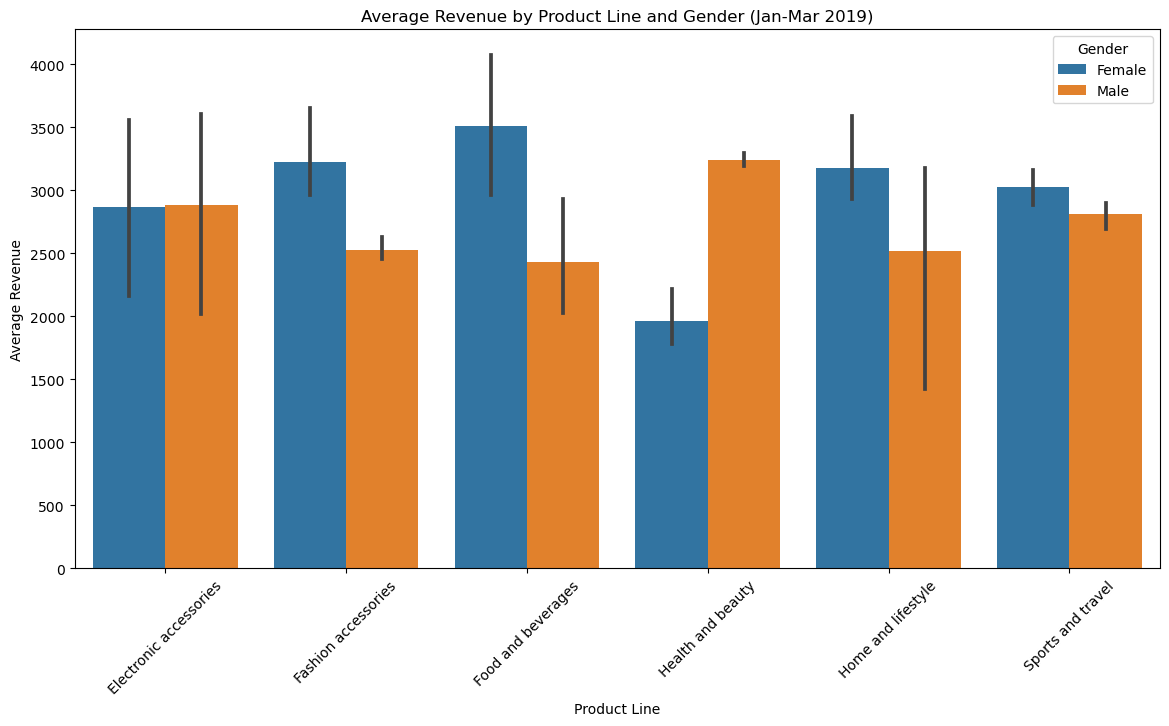

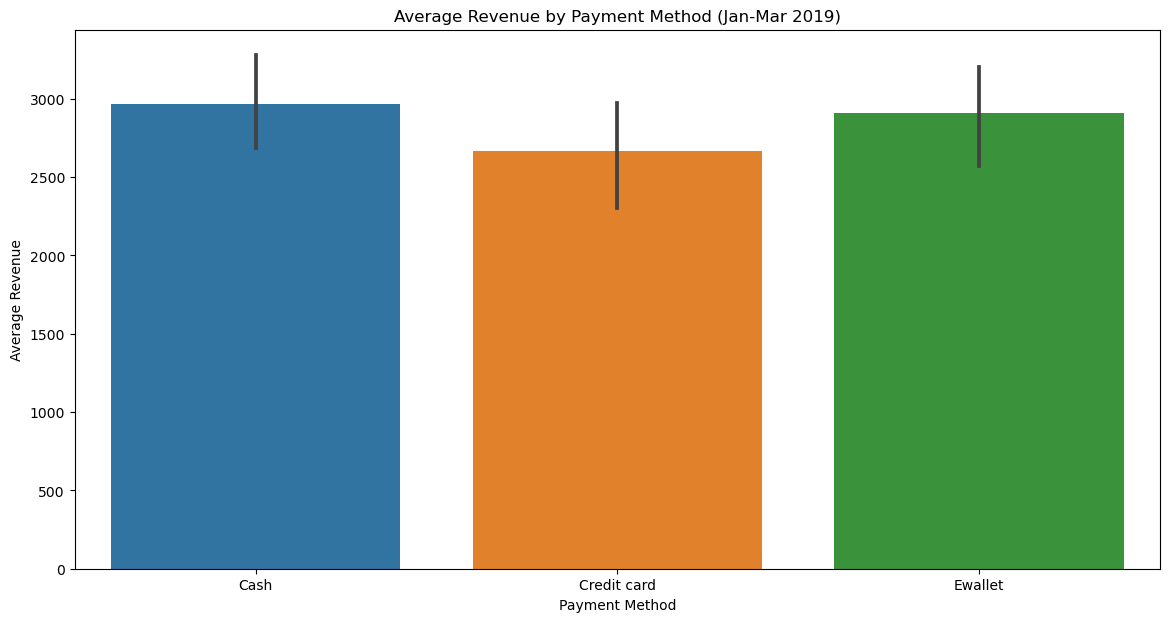

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot average revenue by product line and gender
plt.figure(figsize=(14, 7))
sns.barplot(data=avg_trend, x='Product line', y='Avg revenue', hue='Gender')
plt.title('Average Revenue by Product Line and Gender (Jan-Mar 2019)')
plt.xlabel('Product Line')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# Plot average revenue by payment method
plt.figure(figsize=(14, 7))
sns.barplot(data=avg_trend, x='Payment', y='Avg revenue')
plt.title('Average Revenue by Payment Method (Jan-Mar 2019)')
plt.xlabel('Payment Method')
plt.ylabel('Average Revenue')
plt.show()


# Jar App Exploration:

* Glod's Value chart shows in app should not feature below the interface, it should be at top of interface. **Reason**: During customer visit the site when they see gold value chart, it shows the benefict of gold saving and below that ways of saving interface gives them confidence to invest and option to invest.
* Growth calculator at top of website interface.**Reason**: Easy to audience to calculate their growth and gives trust to buy the golds.
* AI customer relation chat bot.**Reason**: Customer will clarfiy with some doubts like how to invest, what are the benefit those like question can clear by AI bot and futher complex they can contact help center

# Product Optimisation:

* By Email marketing can help bring people to spin the wheel.
* Gamification element like leader board, Offer bounus, level and badges or points, progress bars or chart to track user.
* Higlight benefits and daily rewards
